In [1]:
import cv2
I= cv2.imread("mandril.jpg")

In [ ]:
cv2.imshow("Mandril",I)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
cv2.imwrite("m.png",I)

True

In [3]:
print ( I . shape ) # dimensions / rows , columns , depth /
print ( I . size ) # number of bytes
print ( I . dtype ) # data type

(512, 512, 3)
786432
uint8


Exercis 1.2

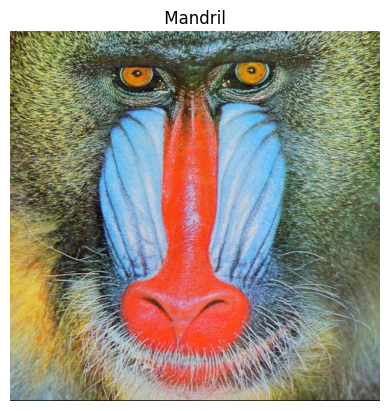

In [4]:
import matplotlib.pyplot as plt
I = plt.imread("mandril.jpg")
plt . figure (1) # create figure
plt . imshow ( I ) # add image
plt . title ( " Mandril ") # add title
plt . axis ( 'off') # disable display of the coordinate system
plt . show () 

In [5]:
plt.imsave("mandril.png" ,I )

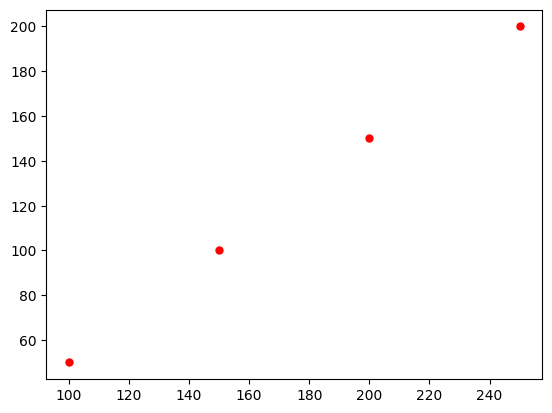

In [6]:
x = [ 100 , 150 , 200 , 250]
y = [ 50 , 100 , 150 , 200]
plt.plot(x ,y , "r." , markersize =10)

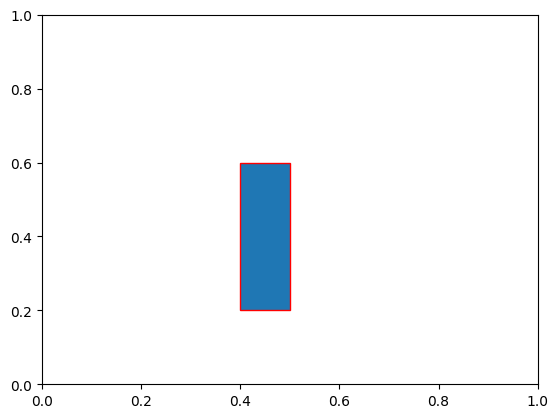

In [7]:
from matplotlib.patches import Rectangle # add at the top of the file
fig , ax = plt.subplots(1) # instead of plt . figure (1)
rect = Rectangle((0.4 ,0.2) ,0.1 ,0.4 , fill = True, ec = "r"); # ec - edge colour
ax.add_patch( rect ) # display
plt . show()

Exercise 1.3

In [8]:
def rgb2gray ( I ) :
    return 0.299* I [: ,: ,0] + 0.587* I [: ,: ,1] + 0.114* I [: ,: ,2]

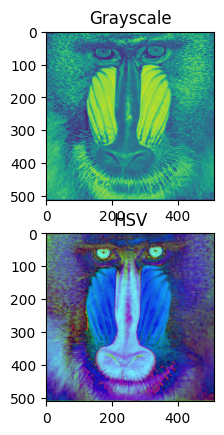

In [8]:
IG = cv2.cvtColor(I , cv2.COLOR_BGR2GRAY )
IHSV = cv2.cvtColor(I , cv2.COLOR_BGR2HSV )
plt.figure(1)
plt.subplot(2,1,1)
plt.title("Grayscale")
plt.imshow(IG)
plt.subplot(2,1,2)
plt.title("HSV")
plt.imshow(IHSV)
plt.show()

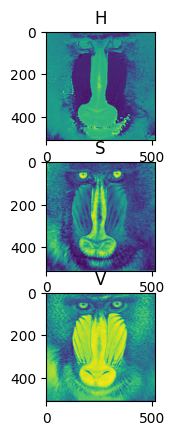

In [9]:
IH = IHSV [: ,: ,0]
IS = IHSV [: ,: ,1]
IV = IHSV [: ,: ,2]

plt.figure(1)
plt.subplot(3,1,1)
plt.title("H")
plt.imshow(IH)
plt.subplot(3,1,2)
plt.title("S")
plt.imshow(IS)
plt.subplot(3,1,3)
plt.title("V")
plt.imshow(IV)
plt.show()

Exercise 1.4

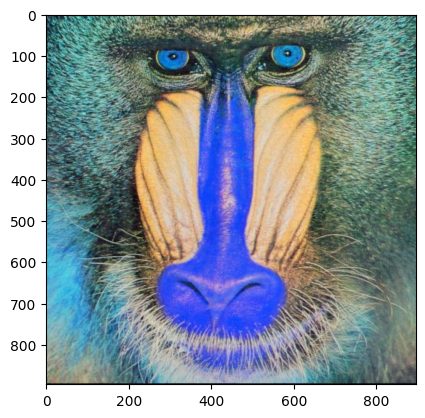

In [11]:
import cv2
I= cv2.imread("mandril.jpg")
height , width = I.shape [:2] # retrieving elements 1 and 2 , i . e . the corresponding
scale = 1.75 # scale factor
Ix2 = cv2.resize(I ,( int ( scale * height ) , int ( scale * width ) ) )
plt.imshow(Ix2)

Exercise 1.5

In [12]:
def rgb2gray ( I ) :
    return 0.299* I [: ,: ,0] + 0.587* I [: ,: ,1] + 0.114* I [: ,: ,2]



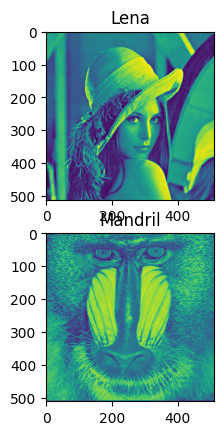

In [13]:
I_lena=cv2.imread("lena.png")
I_mandril=cv2.imread("mandril.jpg")
I_gray_lena = cv2.cvtColor(I_lena , cv2.COLOR_RGB2GRAY )
I_gray_mandril = cv2.cvtColor(I_mandril , cv2.COLOR_RGB2GRAY )
plt.figure(1)
plt.subplot(2,1,1)
plt.title("Lena")
plt.imshow(I_gray_lena)
plt.subplot(2,1,2)
plt.title("Mandril")
plt.imshow(I_gray_mandril)
plt.show()

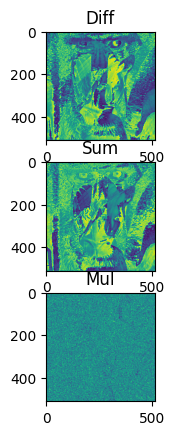

In [14]:
I_diff=I_gray_lena-I_gray_mandril
I_sum=I_gray_lena+I_gray_mandril
I_mul=I_gray_lena*I_gray_mandril
plt.figure(1)
plt.subplot(3,1,1)
plt.title("Diff")
plt.imshow(I_diff)
plt.subplot(3,1,2)
plt.title("Sum")
plt.imshow(I_sum)
plt.subplot(3,1,3)
plt.title("Mul")
plt.imshow(I_mul)
plt.show()

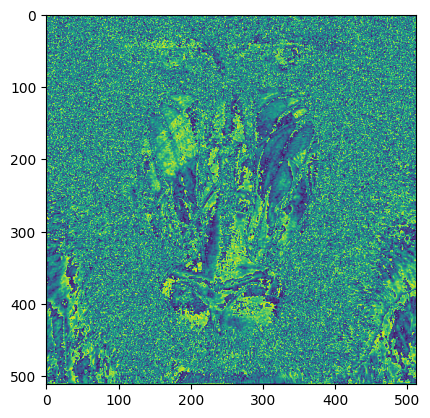

In [15]:
linear=2*I_gray_lena+5*I_gray_mandril
plt.imshow(linear)

<class 'numpy.uint8'>


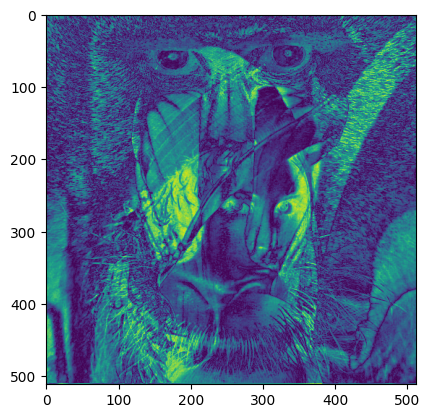

In [16]:
I_abs=cv2.absdiff(I_gray_mandril,I_gray_lena)
plt.imshow(I_abs)
print(type(I_gray_lena[0,0]))

Exercise 1.6

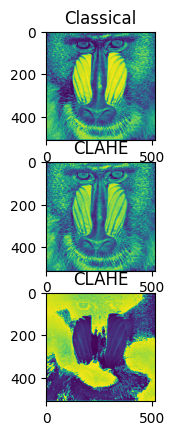

In [17]:
IGE = cv2 . equalizeHist ( I_gray_mandril )
clahe = cv2 . createCLAHE ( clipLimit =2.0 , tileGridSize =(8 ,8) )
I_CLAHE = clahe . apply ( I_gray_mandril )
plt.figure(1)
plt.subplot(3,1,1)
plt.title("Classical")
plt.imshow(IGE)
plt.subplot(3,1,2)
plt.title("CLAHE")
plt.imshow(I_CLAHE)
plt.subplot(3,1,3)
plt.title("CLAHE")
plt.imshow(IGE-I_CLAHE)
plt.show()

Exercise 1.7

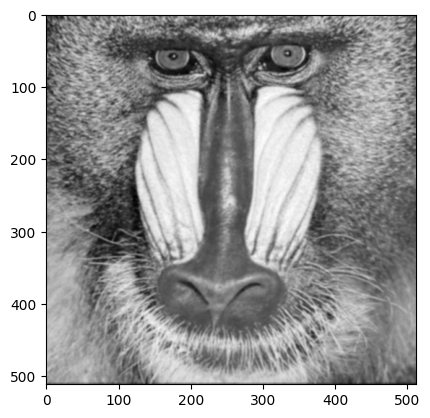

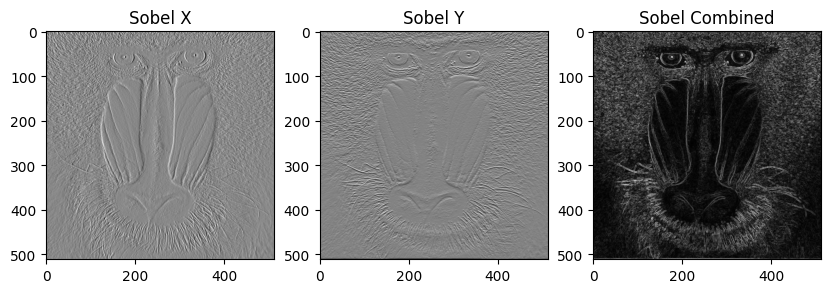

In [22]:
gaus=cv2.GaussianBlur(I_gray_mandril,(5,5),0)
plt.figure(1)
plt.imshow(gaus,cmap='gray')
sobel_x=cv2.Sobel(I_gray_mandril,cv2.CV_64F,1,0,ksize=3)
sobel_y = cv2.Sobel(I_gray_mandril, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.title("Sobel X")
plt.imshow(sobel_x, cmap="gray")

plt.subplot(1, 3, 2)
plt.title("Sobel Y")
plt.imshow(sobel_y, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Sobel Combined")
plt.imshow(sobel_combined, cmap="gray")

plt.show()

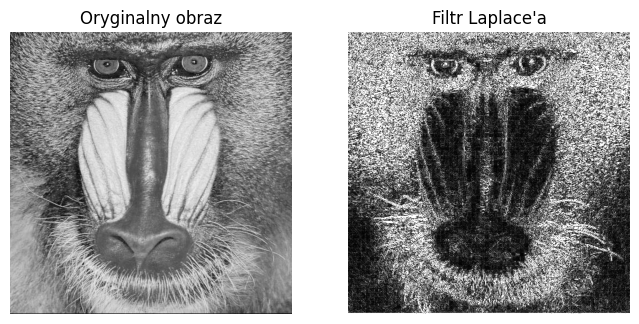

In [23]:
laplacian = cv2.Laplacian(I_gray_mandril, cv2.CV_64F, ksize=3)

# Konwersja do uint8 (zakres [0,255])
laplacian_abs = cv2.convertScaleAbs(laplacian)

# Wizualizacja
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Oryginalny obraz")
plt.imshow(I_gray_mandril, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Filtr Laplace'a")
plt.imshow(laplacian_abs, cmap="gray")
plt.axis("off")

plt.show()

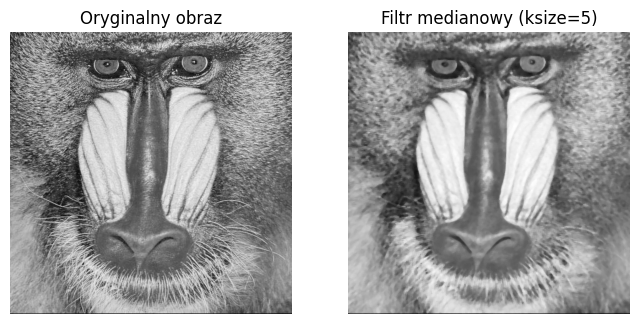

In [24]:
median_filtered = cv2.medianBlur(I_gray_mandril, 5)

# Wizualizacja
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Oryginalny obraz")
plt.imshow(I_gray_mandril, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Filtr medianowy (ksize=5)")
plt.imshow(median_filtered, cmap="gray")
plt.axis("off")

plt.show()